In [40]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt
import pandas as pd


class Env():
    def __init__(self, length, height):
        # define the height and length of the map
        self.length = length
        self.height = height
        # define the agent's start position
        self.x = 0
        self.y = 0

    def render(self, frames=50):
        for i in range(self.height):
            if i == 0: # cliff is in the line 0
                line = ['S'] + ['x']*(self.length - 2) + ['T'] # 'S':start, 'T':terminal, 'x':the cliff
            else:
                line = ['.'] * self.length
            if self.x == i:
                line[self.y] = 'o' # mark the agent's position as 'o'
            
            print(''.join(line))
        print('\033['+str(self.height+1)+'A')  # printer go back to top-left 
        time.sleep(1.0 / frames)

    def step(self, action):
        """4 legal actions, 0:up, 1:down, 2:left, 3:right"""
        change = [[0, 1], [0, -1], [-1, 0], [1, 0]]
        self.x = min(self.height - 1, max(0, self.x + change[action][0]))
        self.y = min(self.length - 1, max(0, self.y + change[action][1]))

        states = [self.x, self.y]
        reward = -1
        terminal = False
        if self.x == 0: # if agent is on the cliff line "SxxxxxT"
            if self.y > 0: # if agent is not on the start position 
                terminal = True
                if self.y != self.length - 1: # if agent falls
                    reward = -100
        return reward, states, terminal

    def reset(self):
        self.x = 0
        self.y = 0




class Q_table():
    def __init__(self, length, height, actions=4, alpha=0.1, gamma=0.9):
        self.table = [0] * actions * length * height # initialize all Q(s,a) to zero
        self.actions = actions
        self.length = length
        self.height = height
        self.alpha = alpha
        self.gamma = gamma

    def _index(self, a, x, y):
        """Return the index of Q([x,y], a) in Q_table."""
        return a * self.height * self.length + x * self.length + y

    def _epsilon(self):
        return 0.1
        # version for better convergence:
        # """At the beginning epsilon is 0.2, after 300 episodes decades to 0.05, and eventually go to 0."""
        # return 20. / (num_episode + 100)

    def take_action(self, x, y, num_episode):
        """epsilon-greedy action selection"""
        if random.random() < self._epsilon():
            return int(random.random() * 4)
        else:
            actions_value = [self.table[self._index(a, x, y)] for a in range(self.actions)]
            return actions_value.index(max(actions_value))

    def max_q(self, x, y):
        actions_value = [self.table[self._index(a, x, y)] for a in range(self.actions)]
        return max(actions_value)

    def update(self, a, s0, s1, r, is_terminated):
        # both s0, s1 have the form [x,y]
        q_predict = self.table[self._index(a, s0[0], s0[1])]
        if not is_terminated:
            q_target = r + self.gamma * self.max_q(s1[0], s1[1])
        else:
            q_target = r
        self.table[self._index(a, s0[0], s0[1])] += self.alpha * (q_target - q_predict)


def cliff_walk():
    env = Env(length=12, height=4)
    table = Q_table(length=12, height=4)
    num_ep = []
    reward_ep = []
    for num_episode in range(10):
        # within the whole learning process
        episodic_reward = 0
        is_terminated = False
        s0 = [0, 0]

        while not is_terminated:
            # within one episode
            action = table.take_action(s0[0], s0[1], num_episode)
            r, s1, is_terminated = env.step(action)
            table.update(action, s0, s1, r, is_terminated)
            episodic_reward += r
            env.render(frames=1)
            s0 = s1
        if num_episode % 1 == 0:
            print("Episode: {}, Score: {}".format(num_episode, episodic_reward))
            num_ep.append(num_episode)
            reward_ep.append(episodic_reward)
            
        env.reset()

    return num_ep, reward_ep

Episode: 0, Score: -100
Episode: 1, Score: -111
Episode: 2, Score: -149
Episode: 3, Score: -115
Episode: 4, Score: -143
Episode: 5, Score: -152
Episode: 6, Score: -122
Episode: 7, Score: -127
Episode: 8, Score: -153
Episode: 9, Score: -212
Episode: 10, Score: -124
Episode: 11, Score: -219
Episode: 12, Score: -116
Episode: 13, Score: -110
Episode: 14, Score: -74
Episode: 15, Score: -265
Episode: 16, Score: -160
Episode: 17, Score: -156
Episode: 18, Score: -228
Episode: 19, Score: -88
Episode: 20, Score: -172
Episode: 21, Score: -432
Episode: 22, Score: -151
Episode: 23, Score: -137
Episode: 24, Score: -104
Episode: 25, Score: -41
Episode: 26, Score: -108
Episode: 27, Score: -164
Episode: 28, Score: -73
Episode: 29, Score: -154
Episode: 30, Score: -62
Episode: 31, Score: -112
Episode: 32, Score: -147
Episode: 33, Score: -194
Episode: 34, Score: -109
Episode: 35, Score: -234
Episode: 36, Score: -72
Episode: 37, Score: -101
Episode: 38, Score: -74
Episode: 39, Score: -107
Episode: 40, Scor

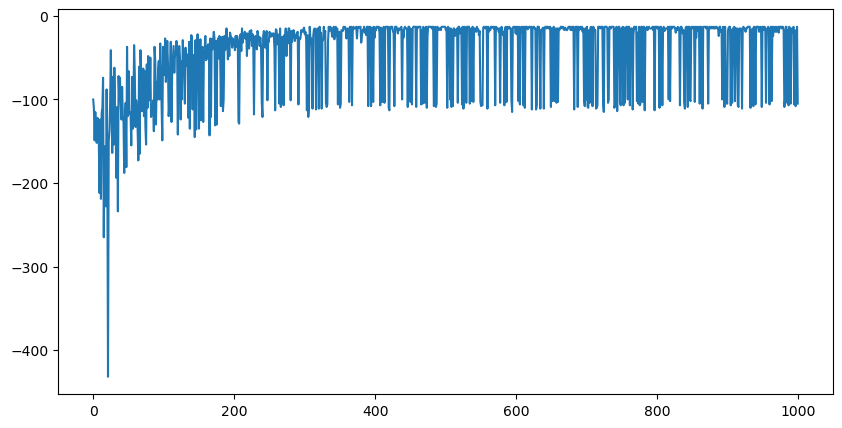

In [41]:
num_episode, episodic_reward = cliff_walk()

plt.figure(figsize=(10,5))
plt.plot(num_episode, episodic_reward)
plt.show()